In [2]:
import numpy as np

# ajuste de matplotlib a parametros esteticos
%config InlineBackend.rc = {}
import matplotlib
#matplotlib.rc_file("../../templates/matplotlibrc")
import matplotlib.pyplot as plt
%matplotlib inline

# Importar y manipular  FITS image

In [3]:
from astropy.io import fits

In [4]:
hdu_list = fits.open('fts_files/20200817_000800_d4c2A.fts')
hdu_list.info()

Filename: fts_files/20200817_000800_d4c2A.fts
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     250   (256, 256)   int16 (rescales to uint16)   


In [5]:
hdu_list[0].header

SIMPLE  =                    T / Written by IDL:  Wed Aug 19 14:31:56 2020      
BITPIX  =                   16 /                                                
NAXIS   =                    2 /                                                
NAXIS1  =                  256 /                                                
NAXIS2  =                  256 /                                                
DATE-OBS= '2020-08-17T00:08:00.021' /                                           
FILEORIG= 'K8170009.411'       /                                                
SEB_PROG= 'DOUBLE  '           /                                                
SYNC    =                    F /                                                
SPWX    =                    F /                                                
EXPCMD  =              2.00090 /                                                
EXPTIME =              2.00123 /  avg of 2 exp bad actual exptim, using expcmd  
DSTART1 =                   

In [6]:
hdu_list[0].data

array([[684, 684, 684, ..., 684, 684, 684],
       [684, 684, 684, ..., 684, 684, 684],
       [684, 684, 684, ..., 684, 684, 684],
       ...,
       [684, 684, 684, ..., 683, 684, 685],
       [685, 684, 685, ..., 684, 684, 684],
       [685, 684, 685, ..., 684, 684, 684]], dtype=uint16)

In [7]:
image_data = hdu_list[0].data

In [8]:
image_data

array([[684, 684, 684, ..., 684, 684, 684],
       [684, 684, 684, ..., 684, 684, 684],
       [684, 684, 684, ..., 684, 684, 684],
       ...,
       [684, 684, 684, ..., 683, 684, 685],
       [685, 684, 685, ..., 684, 684, 684],
       [685, 684, 685, ..., 684, 684, 684]], dtype=uint16)

In [9]:
print(type(image_data))
print(image_data.shape)

<class 'numpy.ndarray'>
(256, 256)


In [10]:
hdu_list.close()

## Método `fits.getdata`

In [11]:
#image_data = fits.getdata(hdu_list)
print(type(image_data))
print(image_data.shape)

<class 'numpy.ndarray'>
(256, 256)


## Ver imagen


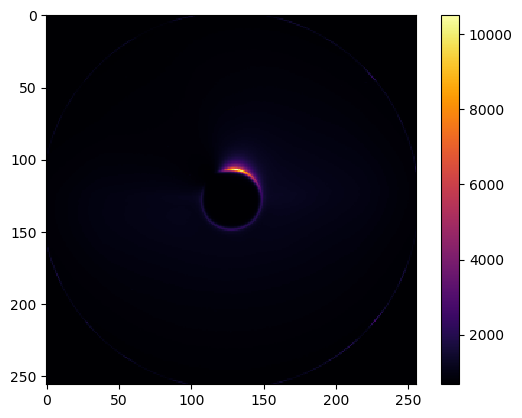

In [25]:
plt.imshow(image_data, cmap='inferno')
plt.colorbar()

In [13]:
print('Min:', np.min(image_data))
print('Max:', np.max(image_data))
print('Mean:', np.mean(image_data))
print('Stdev:', np.std(image_data))

Min: 683
Max: 10517
Mean: 862.3365936279297
Stdev: 265.75442596169614


## Estadística descriptiva

In [16]:
print(type(image_data.flatten()))

<class 'numpy.ndarray'>


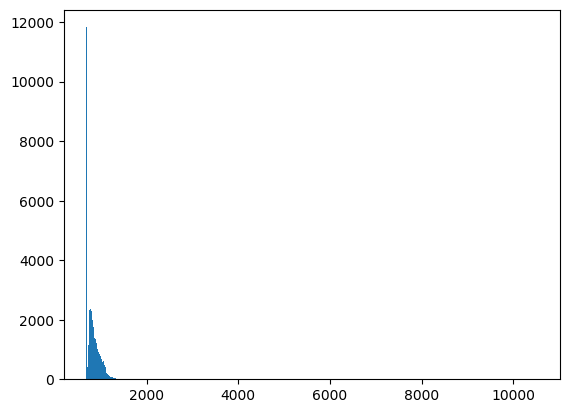

In [26]:
NBINS = 1000
histogram = plt.hist(image_data.flatten(), NBINS)

# Remarcar diferencias con label Logaritmico

In [19]:
from matplotlib.colors import LogNorm

[Text(1, 0, '1,000'), Text(1, 0, '5,000'), Text(1, 0, '10,000')]

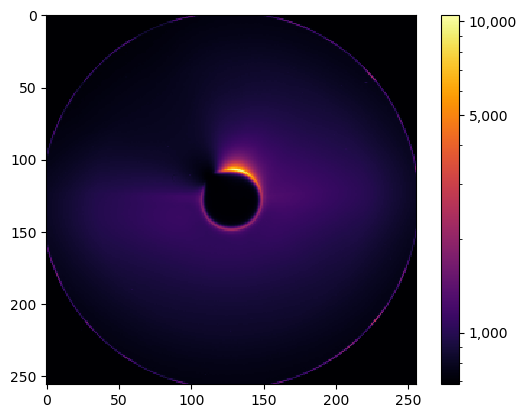

In [24]:
plt.imshow(image_data, cmap='inferno', norm=LogNorm())
cbar = plt.colorbar(ticks=[1.e3,5.e3,10.e3])
cbar.ax.set_yticklabels(['1,000','5,000','10,000'])